# Data enrichment
When creating the maps we realized that the high outliers  were grouping most of the ZIP codes into one category, the 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('data_final.csv',sep=';')

In [22]:
data.median()

C:\Users\jorda\AppData\Local\Temp\ipykernel_23984\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


ZIPCode                            49720.5
Households                          1011.0
Median_Per_Households              66866.0
Family_Household                     686.0
Median_Per_Family_Households       81493.5
Married_Households                   526.0
Median_Per_Married_Households      92577.0
NonFamily_Households                 311.0
Median_Per_NonFamily_Households    39803.0
dtype: float64

In [31]:
for i in range(0, 10):
    data.quantile(i/10)

C:\Users\jorda\AppData\Local\Temp\ipykernel_23984\1383608391.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.quantile(i/10)


In [47]:
# Assuming data is your DataFrame containing numerical variables

# List of numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
# Dictionary to store quartiles for each numerical column
quartiles_dict = {}

# Calculate quartiles for each numerical column
for column in numerical_columns:
    if column != 'ZIPCode':
        quartiles_dict[column] = [data[column].quantile(i / 10) for i in range(11)]

# Create a DataFrame from the quartiles dictionary
quartiles_df = pd.DataFrame(quartiles_dict, index=[f'{i}0%' for i in range(11)])

quartiles_df

,Households,Median_Per_Households,Family_Household,Median_Per_Family_Households,Married_Households,Median_Per_Married_Households,NonFamily_Households,Median_Per_NonFamily_Households
00%,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
10%,64.0,41875.0,39.0,52043.9,29.0,62500.0,17.0,22198.0
20%,170.0,50083.4,111.0,61745.0,87.0,72827.8,53.0,27721.0
30%,334.0,55909.0,223.0,68861.1,174.0,80060.6,105.0,31891.0
40%,588.0,61145.2,395.0,75295.2,307.0,86336.6,183.0,35750.0
50%,1011.0,66866.0,686.0,81493.5,526.0,92577.0,311.0,39803.0
60%,1844.0,72869.2,1233.0,88398.8,926.0,99583.0,558.0,44167.0
70%,3634.1,80584.6,2378.0,96720.2,1741.0,108443.2,1129.0,49331.0
80%,7103.0,91513.0,4500.6,109225.2,3209.0,120668.2,2292.0,56431.0
90%,12143.4,111291.6,7737.8,132020.2,5581.0,144310.3,4259.0,68214.0


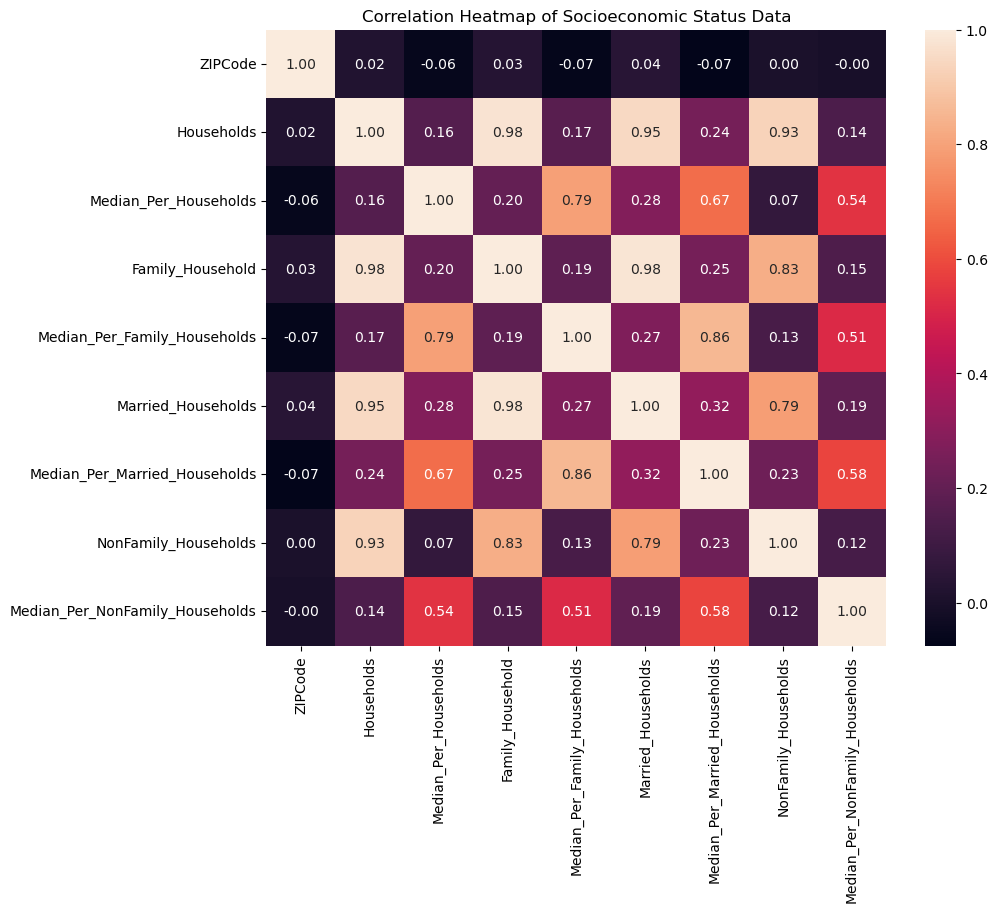

In [48]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Socioeconomic Status Data')
plt.show()